<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Clustering/mall_customers_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.shape

(200, 5)

In [ ]:
df['CustomerID'].shape

(200,)

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


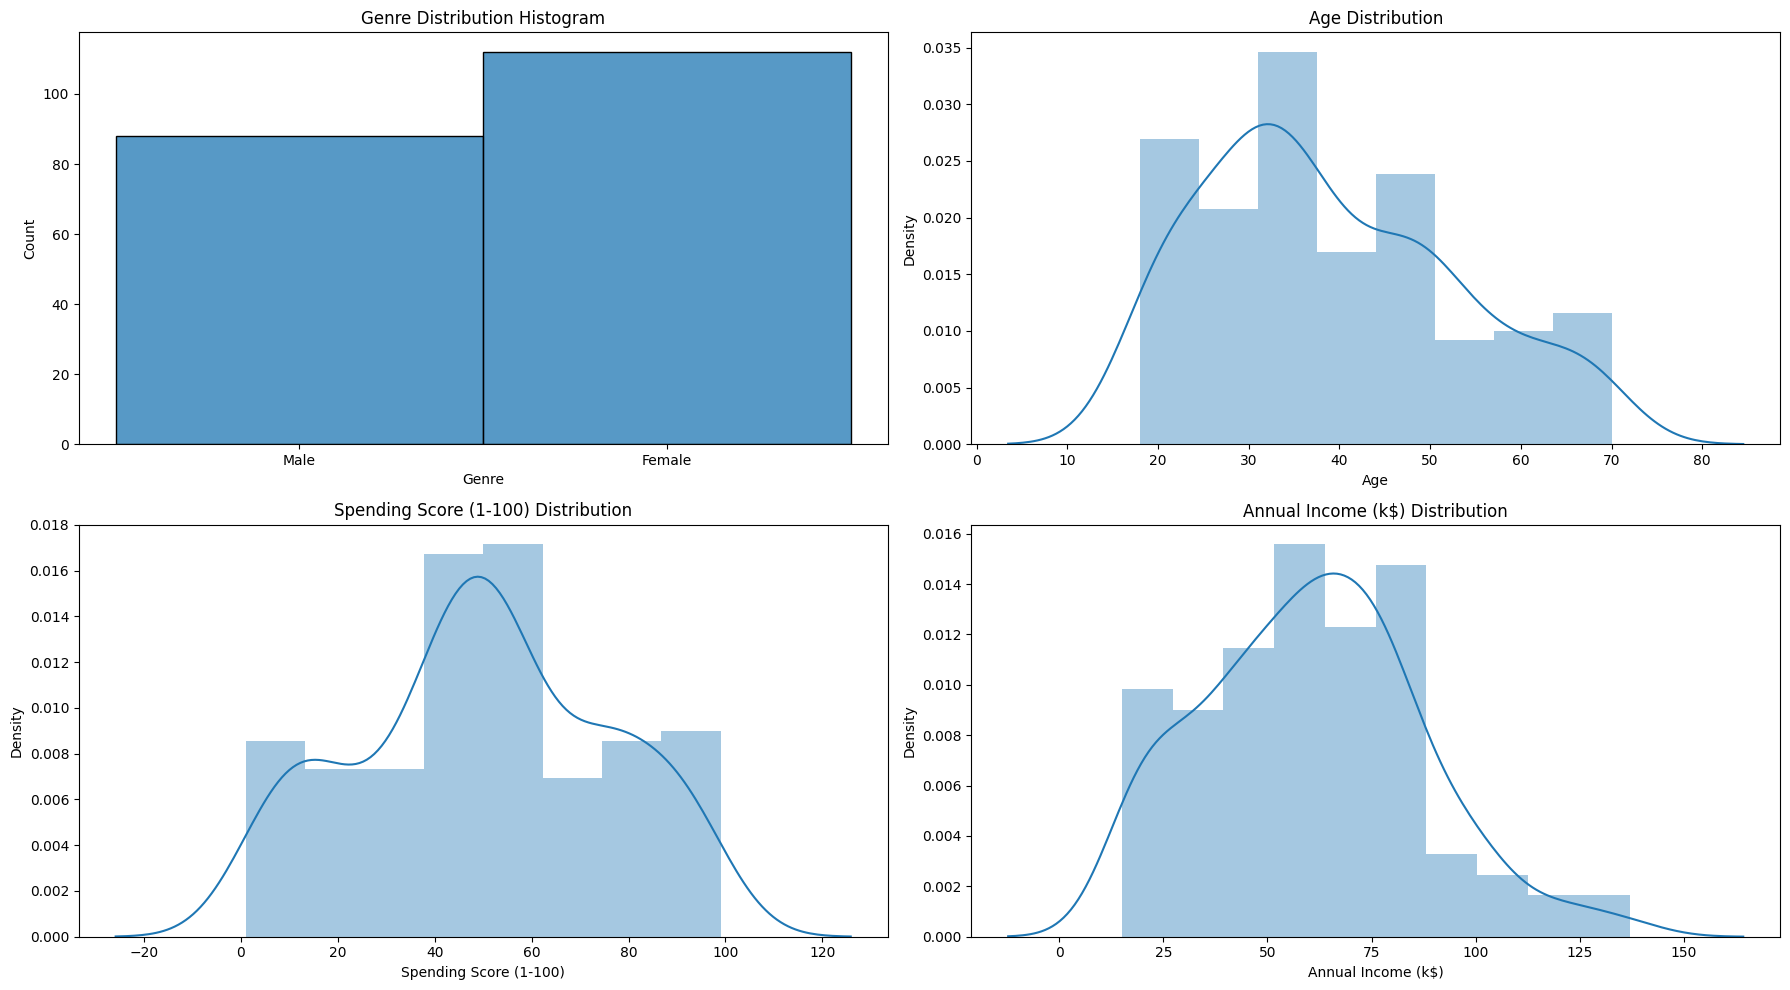

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(data=df,x='Genre',ax=axes[0,0])
axes[0,0].set_title('Genre Distribution Histogram')
sns.distplot(df['Age'],ax=axes[0,1])
axes[0,1].set_title('Age Distribution')
sns.distplot(df['Spending Score (1-100)'],ax=axes[1,0])
axes[1,0].set_title('Spending Score (1-100) Distribution')
sns.distplot(df['Annual Income (k$)'],ax=axes[1,1])
axes[1,1].set_title('Annual Income (k$) Distribution')
plt.tight_layout()

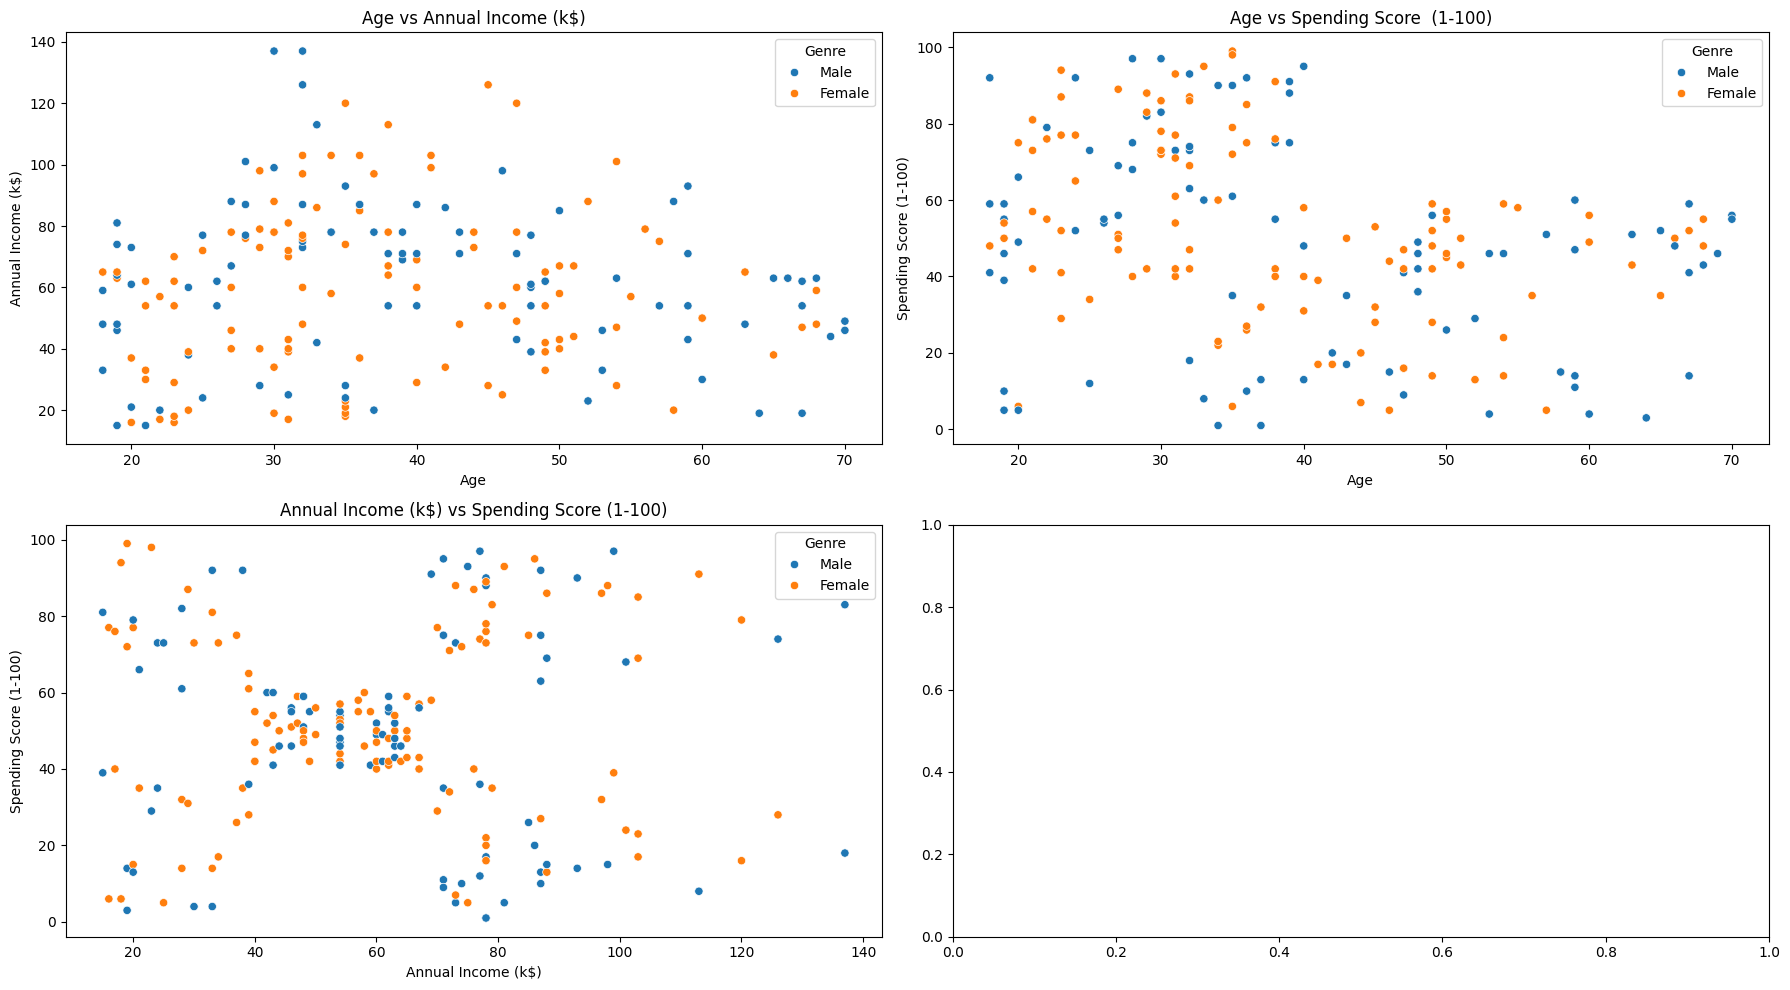

In [ ]:
#df[df['Genre']=='Male']
#df=df[df['Genre']=='Male']
#df=df[df['Genre']=='Female']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.scatterplot(data = df,
                x = 'Age',
                y = 'Annual Income (k$)', hue='Genre', ax=axes[0,0]);
axes[0,0].set_title('Age vs Annual Income (k$)')
sns.scatterplot(data = df,
                x = 'Age',
                y = 'Spending Score (1-100)', hue='Genre' , ax=axes[0,1]);
axes[0,1].set_title('Age vs Spending Score  (1-100)')
sns.scatterplot(data = df,
                x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)', hue='Genre',  ax=axes[1,0]);
axes[1,0].set_title('Annual Income (k$) vs Spending Score (1-100)')
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
km =KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [ ]:
df["cluster"]=y_pred
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

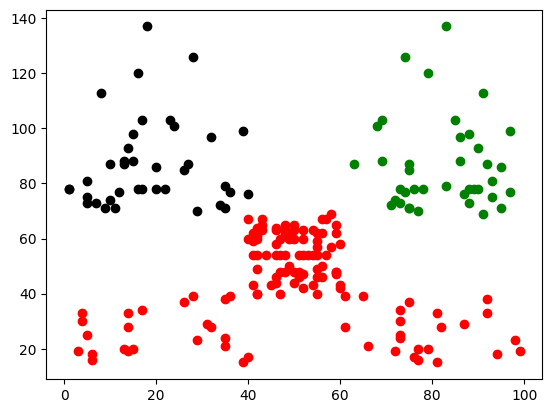

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color="green")
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color="red")
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color="black")
plt

Here , No overlapping of clusters found, No need of scaling I think

Lets look for optimal clusters using WCSS method

In [ ]:
wcss=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  wcss.append(km.inertia_)

print(wcss)

[269981.28000000014, 183257.8615446179, 106348.37306211119, 82472.19413919412, 44448.45544793369, 37455.98455516028, 31631.18208874459, 28487.82143100373, 22830.10333064867]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

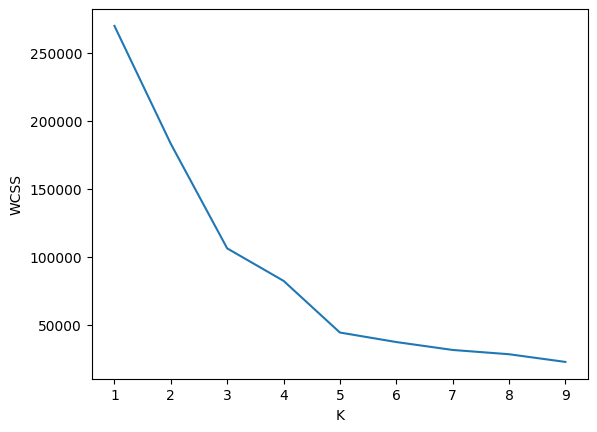

In [ ]:
plt.plot(k_rng,wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt

Are there two elbows ??

Lets try with 5 clusters

In [ ]:
from sklearn.cluster import KMeans
km =KMeans(n_clusters=5)
y_pred=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
df["cluster"]=y_pred
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

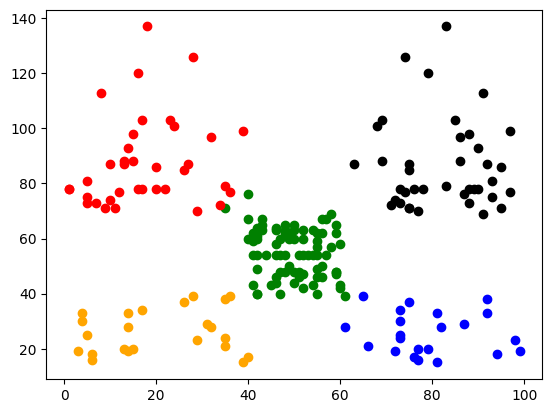

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color="green")
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color="red")
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color="black")
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color="orange")
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color="blue")
plt

This looks even better as we have quite clearly seperable clusters, A vew few points if green and red do overlapp , Is it accetable ??
How do we evalute the model accuracy?